In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [2]:
df = pd.read_csv('spam.csv', encoding = 'latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#dropping null valaue columns
df.drop(columns =['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [6]:
df.rename(columns = {'v1':'target', 'v2': 'text'}, inplace = True)

In [7]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df.target = encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df = df.drop_duplicates(keep = "first")

In [14]:
df.duplicated().sum()

0

In [15]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

Text(0.5, 1.0, 'Ham and Spam Distribution')

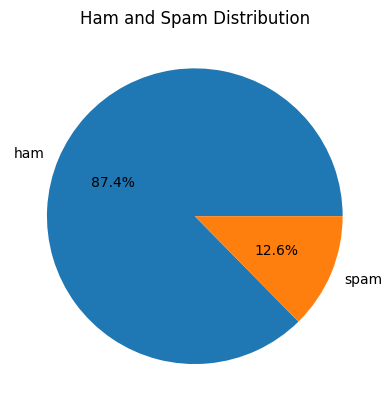

In [16]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.1f%%')
plt.title('Ham and Spam Distribution')

In [17]:
!pip install nltk

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
df['num_characters'] = df['text'].apply(len)
df.head()

<ipython-input-19-dbc9bed4a965>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
df['num_words'] = df['text'].apply(nltk.word_tokenize)

<ipython-input-20-41d10ea2870a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(nltk.word_tokenize)


In [21]:
df['num_words'] = df['num_words'].apply(len)
df

<ipython-input-21-10e3e9de3e52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['num_words'].apply(len)


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [22]:
df['num_sentences'] = df['text'].apply(nltk.sent_tokenize)
df

<ipython-input-22-87c1af1353fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(nltk.sent_tokenize)


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl..."
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar..."
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,[This is the 2nd time we have tried 2 contact ...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,[Will Ì_ b going to esplanade fr home?]
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,"[Pity, * was in mood for that., So...any other..."
5570,0,The guy did some bitching but I acted like i'd...,125,27,[The guy did some bitching but I acted like i'...


In [23]:
df['num_sentences'] = df['num_sentences'].apply(len)
df

<ipython-input-23-170f98a39188>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['num_sentences'].apply(len)


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [24]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#view ham messages
df.loc[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#view spam messages
df.loc[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


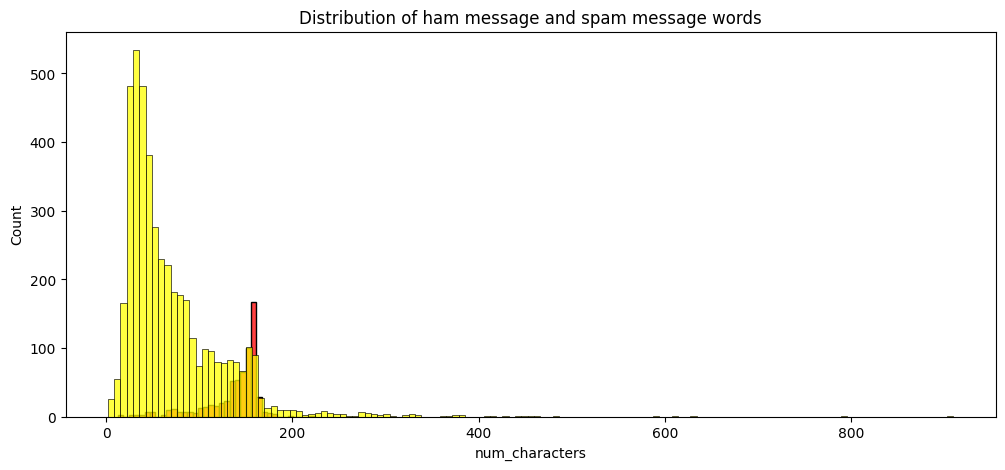

In [27]:
#histogram of spam and ham messages
plt.figure(figsize=(12, 5))
ham_msg = df.loc[df['target'] == 0][['num_characters']]
spam_msg = df.loc[df['target'] == 1][['num_characters']]
sns.histplot(spam_msg['num_characters'], color = 'red')
sns.histplot(ham_msg['num_characters'], color = 'yellow')
plt.title('Distribution of ham message and spam message words')
plt.show()

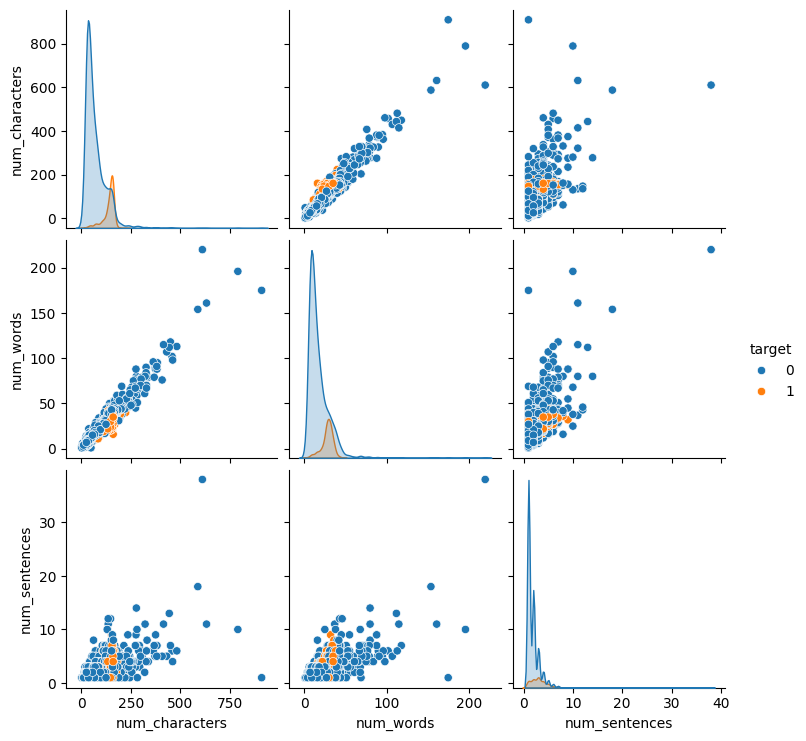

In [28]:
sns.pairplot(df, hue = 'target')
plt.show()

In [29]:
df[['target', 'num_characters', 'num_words', 'num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


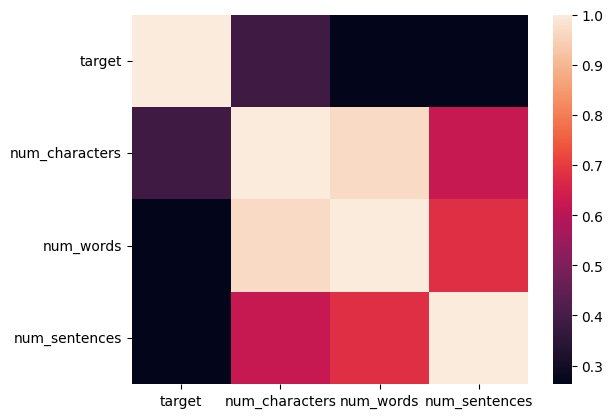

In [30]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr())
plt.show()

In [31]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
ps = PorterStemmer

In [89]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()  # Add parentheses to create an instance of PorterStemmer

def trans_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []

    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [90]:
trans_text("I loved the internship. What about you?")

'love internship'

In [93]:
df['trans_text'] = df['text'].apply(trans_text)

<ipython-input-93-3c8076532a9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_text'] = df['text'].apply(trans_text)


In [94]:
df.head()

,target,text,num_characters,num_words,num_sentences,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [95]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'trans_text'],
      dtype='object')

In [51]:
!pip install wordCloud

<ipython-input-96-32fdb96372f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_text'] = df['trans_text'].astype(str)


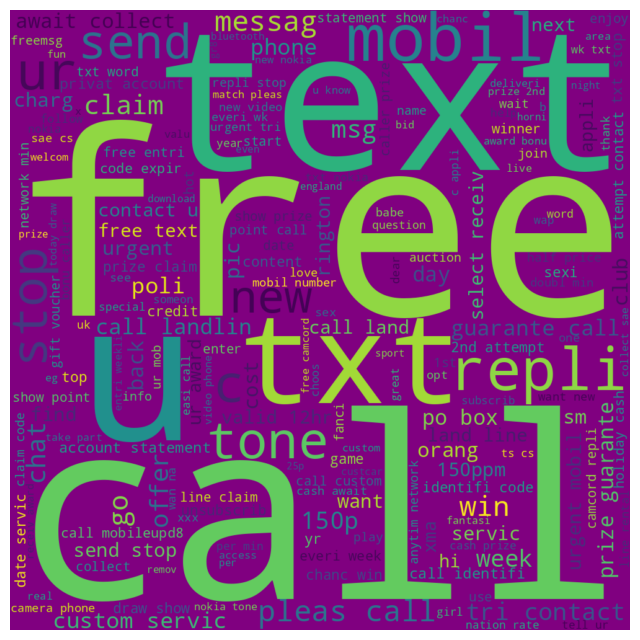

In [96]:
df['trans_text'] = df['trans_text'].astype(str)

plt.figure(figsize=(8, 15))

wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='purple')
spam_wc = wc.generate(df[df['target'] == 1]['trans_text'].str.cat(sep=" "))

plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


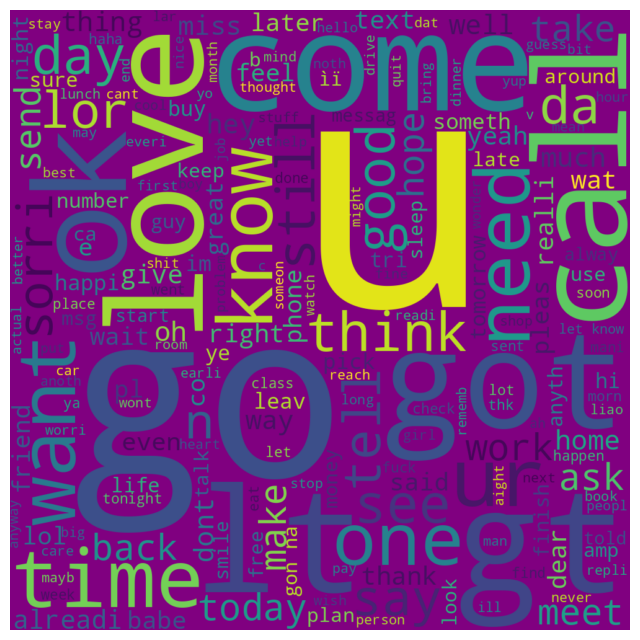

In [97]:
plt.figure(figsize=(8, 15))

wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='purple')
non_spam_wc = wc.generate(df[df['target'] == 0]['trans_text'].str.cat(sep=" "))

plt.imshow(non_spam_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [98]:
df.loc[df['target'] == 1]['trans_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: trans_text, Length: 653, dtype: object

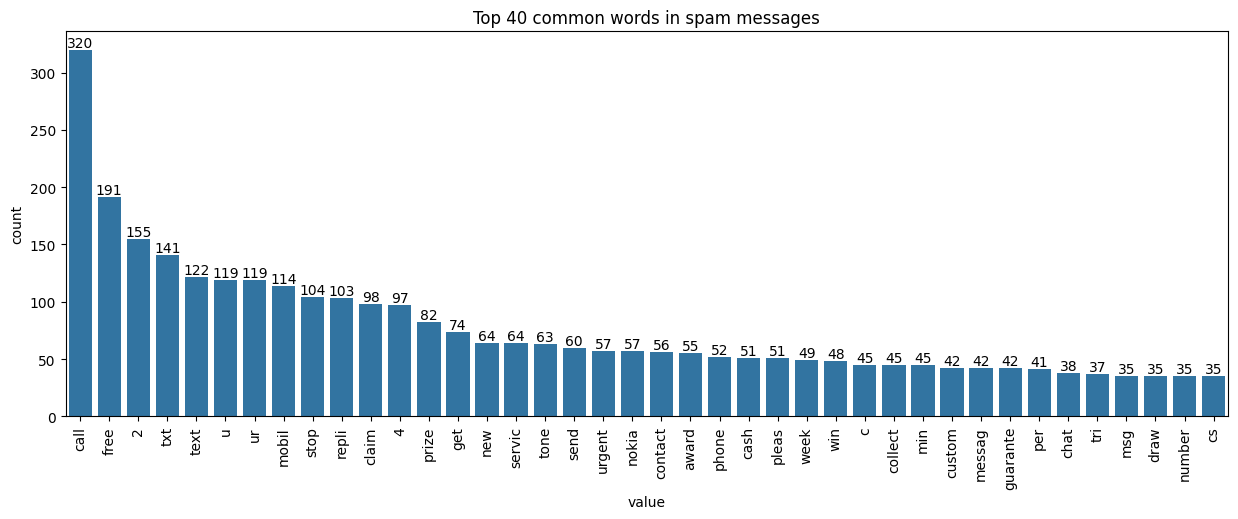

In [99]:
plt.figure(figsize=(15, 5))
from collections import Counter
import seaborn as sns

spam_words = []
for message in df.loc[df['target'] == 1]['trans_text'].tolist():
    for words in message.split():
        spam_words.append(words)

spam_data = pd.DataFrame(Counter(spam_words).most_common(40), columns=['value', 'count'])
ax = sns.barplot(x='value', y='count', data=spam_data)
plt.title('Top 40 common words in spam messages')
plt.xticks(rotation=90)  # Corrected typo in 'xticks' and 'rotation'
for bars in ax.containers:
    ax.bar_label(bars)


In [100]:
df.loc[df['target'] == 0]['trans_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: trans_text, Length: 4516, dtype: object

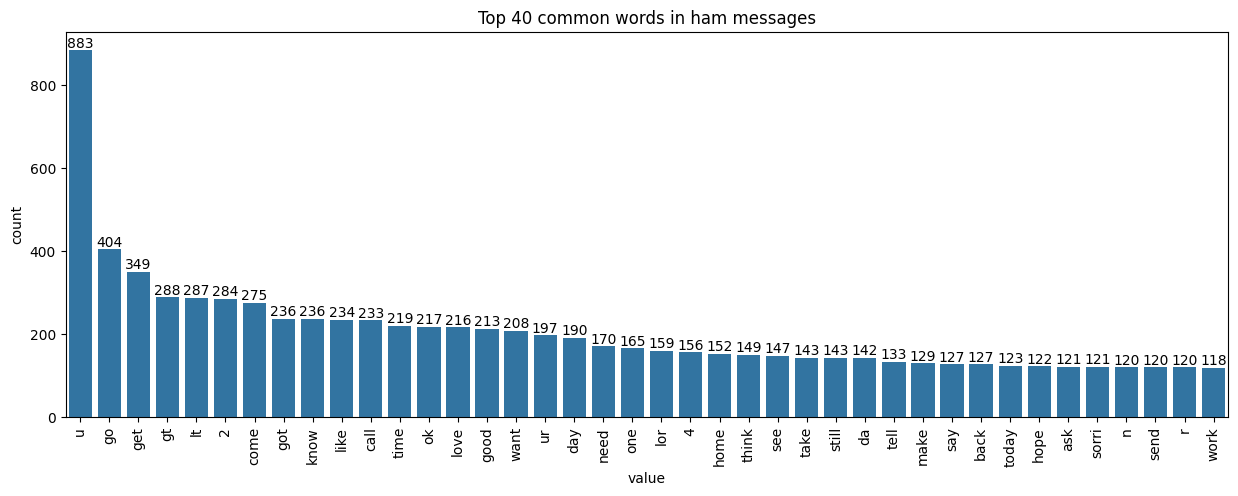

In [101]:
plt.figure(figsize=(15, 5))
from collections import Counter
import seaborn as sns

ham_words = []
for message in df.loc[df['target'] == 0]['trans_text'].tolist():
    for word in message.split():
        ham_words.append(word)

ham_data = pd.DataFrame(Counter(ham_words).most_common(40), columns=['value', 'count'])
ax = sns.barplot(x='value', y='count', data=ham_data)
plt.title('Top 40 common words in ham messages')
plt.xticks(rotation=90)  # Corrected typo in 'xticls' to 'xticks' and 'rotations' to 'rotation'
for bars in ax.containers:
    ax.bar_label(bars)


In [102]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()

x1 = cv.fit_transform(df['trans_text']).toarray()
print("SMS: ", x1.shape[0])
print("total words: ", x1.shape[1])


SMS:  5169
total words:  6708


In [103]:
print(x1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [104]:
from collections.abc import ValuesView
y1 = df['target'].values

In [105]:
y1 = df['target'].values

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Assuming x1 and y1 are already defined

# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=2)

# Initialize Naive Bayes models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Train the models
gnb.fit(x1_train, y1_train)
mnb.fit(x1_train, y1_train)
bnb.fit(x1_train, y1_train)

# Predict on the test set
gnb_pred = gnb.predict(x1_test)
mnb_pred = mnb.predict(x1_test)
bnb_pred = bnb.predict(x1_test)

# Evaluate the models
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y1_test, gnb_pred))
print("Multinomial Naive Bayes Accuracy:", accuracy_score(y1_test, mnb_pred))
print("Bernoulli Naive Bayes Accuracy:", accuracy_score(y1_test, bnb_pred))

# You can also print confusion matrices and precision scores
print("\nConfusion Matrix (Gaussian NB):\n", confusion_matrix(y1_test, gnb_pred))
print("Precision Score (Gaussian NB):", precision_score(y1_test, gnb_pred))

print("\nConfusion Matrix (Multinomial NB):\n", confusion_matrix(y1_test, mnb_pred))
print("Precision Score (Multinomial NB):", precision_score(y1_test, mnb_pred))

print("\nConfusion Matrix (Bernoulli NB):\n", confusion_matrix(y1_test, bnb_pred))
print("Precision Score (Bernoulli NB):", precision_score(y1_test, bnb_pred))


Gaussian Naive Bayes Accuracy: 0.8800773694390716
Multinomial Naive Bayes Accuracy: 0.9642166344294004
Bernoulli Naive Bayes Accuracy: 0.9700193423597679

Confusion Matrix (Gaussian NB):
 [[792 104]
 [ 20 118]]
Precision Score (Gaussian NB): 0.5315315315315315

Confusion Matrix (Multinomial NB):
 [[871  25]
 [ 12 126]]
Precision Score (Multinomial NB): 0.8344370860927153

Confusion Matrix (Bernoulli NB):
 [[893   3]
 [ 28 110]]
Precision Score (Bernoulli NB): 0.9734513274336283


In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 1000)

x = tfidf.fit_transform(df['trans_text']).toarray()
print(x.shape)

(5169, 1000)


In [109]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [110]:
y = df['target'].values

In [111]:
#now we apply train-test-split
from sklearn.model_selection import train_test_split

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Assuming x and y are already defined

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Initialize Naive Bayes models
gnb1 = GaussianNB()
mnb1 = MultinomialNB()
bnb1 = BernoulliNB()

# Train the models
gnb1.fit(x_train, y_train)
mnb1.fit(x_train, y_train)
bnb1.fit(x_train, y_train)

# Predict on the test set
gnb1_pred = gnb1.predict(x_test)
mnb1_pred = mnb1.predict(x_test)
bnb1_pred = bnb1.predict(x_test)

# Evaluate the models
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, gnb1_pred))
print("Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, mnb1_pred))
print("Bernoulli Naive Bayes Accuracy:", accuracy_score(y_test, bnb1_pred))

# You can also print confusion matrices and precision scores
print("\nConfusion Matrix (Gaussian NB):\n", confusion_matrix(y_test, gnb1_pred))
print("Precision Score (Gaussian NB):", precision_score(y_test, gnb1_pred))

print("\nConfusion Matrix (Multinomial NB):\n", confusion_matrix(y_test, mnb1_pred))
print("Precision Score (Multinomial NB):", precision_score(y_test, mnb1_pred))

print("\nConfusion Matrix (Bernoulli NB):\n", confusion_matrix(y_test, bnb1_pred))
print("Precision Score (Bernoulli NB):", precision_score(y_test, bnb1_pred))


Gaussian Naive Bayes Accuracy: 0.7804642166344294
Multinomial Naive Bayes Accuracy: 0.9777562862669246
Bernoulli Naive Bayes Accuracy: 0.9835589941972921

Confusion Matrix (Gaussian NB):
 [[687 209]
 [ 18 120]]
Precision Score (Gaussian NB): 0.364741641337386

Confusion Matrix (Multinomial NB):
 [[895   1]
 [ 22 116]]
Precision Score (Multinomial NB): 0.9914529914529915

Confusion Matrix (Bernoulli NB):
 [[893   3]
 [ 14 124]]
Precision Score (Bernoulli NB): 0.9763779527559056


In [117]:
!apt-get -qq install -y graphviz && pip install ensemble
import ensemble

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ensemble: filename=ensemble-0.0.dev1-py3-none-any.whl size=4423 sha256=7a4d4d1a8512dcb504348ed7e762bd1e52fe74ebc20132e233a3da91e04180ff
  Stored in directory: /root/.cache/pip/wheels/f8/5e/6d/5939762d48c36c592ff51fc93ea712a7f4ed855f81db56af90
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=2703dfd556210b4bfaf87a1b6ef1dd2b01ebc7ee017217d08b24590f57d59242
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for pysut: filename=pysut-1.1-py3-none-any.whl size=29062 sha256=e34de8601b3f2c3a5cc8587e569d7cbc4fb9ff30ad2f22fb09517eb69ef281ea
  Stored in directory: /root/.cache/pip/wheels/90/75/58/dd19876c55b3ece8c118b2e60720e0fa69fc2c01d6a71d5319
Successfully built ensemble docopt pysut


In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [122]:
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1')
dt = DecisionTreeClassifier(max_depth=5)
kn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators = 50, random_state=2)

In [123]:
classifiers = {
    'LR': lr,
    'DT': dt,
    'KN':kn,
    'RF':rf
}

In [124]:
def train_class(classifier, x_train, y_train, x_test, y_test):
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  return accuracy, precision

In [126]:
train_class(lr, x_train, y_train, x_test, y_test)

(0.9613152804642167, 0.9622641509433962)

In [130]:
accuracy_scores = []
precision_scores = []

for name, classifier in classifiers.items():
  current_accuracy, current_precision = train_class(classifier, x_train, y_train, x_test, y_test)
  print('For: ', name)
  print('Accuracy:', current_accuracy)
  print('Precision: ', current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For:  LR
Accuracy: 0.9613152804642167
Precision:  0.9622641509433962
For:  DT
Accuracy: 0.9381044487427466
Precision:  0.8627450980392157
For:  KN
Accuracy: 0.9168278529980658
Precision:  1.0
For:  RF
Accuracy: 0.9738878143133463
Precision:  0.944


In [131]:
performance_df = pd.DataFrame({'algorithm': classifiers.keys(), 'accuracy': accuracy_scores, 'precision': precision_scores})
performance_df.sort_values("precision", ascending = False)

,algorithm,accuracy,precision
2,KN,0.916828,1.000000
0,LR,0.961315,0.962264
3,RF,0.973888,0.944000
1,DT,0.938104,0.862745


In [132]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))